In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df = pd.read_csv('Fish.csv')

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


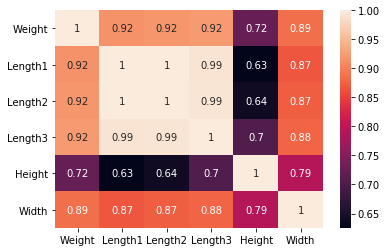

In [38]:
sns.heatmap(df.corr(),annot=True)

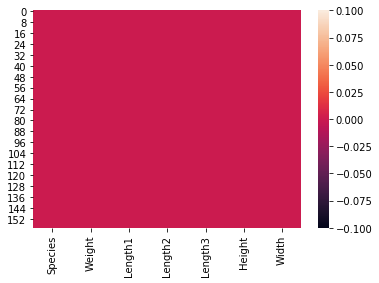

In [39]:
sns.heatmap(df.isnull())

In [40]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

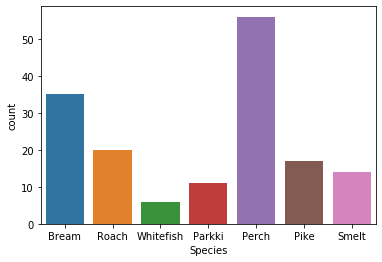

In [41]:
sns.countplot(x='Species', data=df)
#well this is unfortunate - unbalance dataset

In [42]:
df1=df2=df3=df4=df5=df6=df7=0
df1=df[df['Species']=='Bream']
df2=df[df['Species']=='Roach']
df3=df[df['Species']=='Whitefish']
df4=df[df['Species']=='Parkki']
df5=df[df['Species']=='Perch']
df6=df[df['Species']=='Pike']
df7=df[df['Species']=='Smelt']
print(len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7))

35 20 6 11 56 17 14


In [43]:
#35 = 7 5
#20 = 2 2 5
#6 = 2 3
#11 = 11
#56 = 2 2 2 7
#17 = 17
#14 = 2 7
a=2*2*5*7*3*2*3

print(a/35,a/20,a/6,a/11,a/56,a/17,a/14)

72.0 126.0 420.0 229.0909090909091 45.0 148.23529411764707 180.0


In [44]:
df1=pd.concat(72*[df1],axis=0)
df2=pd.concat(126*[df2],axis=0)
df3=pd.concat(420*[df3],axis=0)
df4=pd.concat(229*[df4],axis=0)
df5=pd.concat(45*[df5],axis=0)
df6=pd.concat(148*[df6],axis=0)
df7=pd.concat(180*[df7],axis=0)
df_all=pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=0)
print(len(df_all))

17635


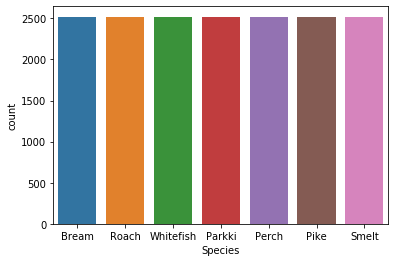

In [45]:
sns.countplot(x='Species', data=df_all)
#balanced

In [46]:
df_all = df_all.reset_index()

In [47]:
ryba = {'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6}
ryba_id = []
for i in range(len(df_all)):
    ryba_id.append(ryba[df_all['Species'][i]])
    
df_all['id']=ryba_id

In [48]:
df_all.head()

,index,Species,Weight,Length1,Length2,Length3,Height,Width,id
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [49]:
X=df_all.drop(['Species','id','index'],axis=1)
y=df_all['id']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
early = EarlyStopping(monitor = 'val_loss', patience=2)

In [54]:
X_train

array([[0.18545455, 0.35145631, 0.35636364, 0.37162162, 0.40918008,
        0.512235  ],
       [0.00606061, 0.07378641, 0.06181818, 0.07263514, 0.02817989,
        0.03329387],
       [0.32727273, 0.63300971, 0.62909091, 0.625     , 0.35160141,
        0.5753834 ],
       ...,
       [0.18545455, 0.35145631, 0.35636364, 0.37162162, 0.40918008,
        0.512235  ],
       [0.34848485, 0.46213592, 0.46545455, 0.51858108, 0.77778229,
        0.63739005],
       [0.00593939, 0.07572816, 0.06545455, 0.07432432, 0.02762848,
        0.01420839]])

In [70]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(6,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='sigmoid'))

model.add(Dense(7, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [71]:
model.fit(X_train, y_train_cat, validation_data=(X_test,y_test_cat), epochs=50, verbose=1, callbacks=[early])

Train on 11815 samples, validate on 5820 samples
Epoch 1/50
11815/11815 [==============================] - 1s 120us/sample - loss: 1.6180 - val_loss: 1.2270
Epoch 2/50
11815/11815 [==============================] - 1s 66us/sample - loss: 0.9599 - val_loss: 0.7431
Epoch 3/50
11815/11815 [==============================] - 1s 75us/sample - loss: 0.6267 - val_loss: 0.5274
Epoch 4/50
11815/11815 [==============================] - 1s 97us/sample - loss: 0.4686 - val_loss: 0.4048
Epoch 5/50
11815/11815 [==============================] - 1s 103us/sample - loss: 0.3690 - val_loss: 0.3198
Epoch 6/50
11815/11815 [==============================] - 1s 100us/sample - loss: 0.2961 - val_loss: 0.2675
Epoch 7/50
11815/11815 [==============================] - 1s 87us/sample - loss: 0.2550 - val_loss: 0.2393
Epoch 8/50
11815/11815 [==============================] - 1s 83us/sample - loss: 0.2244 - val_loss: 0.2082
Epoch 9/50
11815/11815 [==============================] - 1s 84us/sample - loss: 0.2046 - va

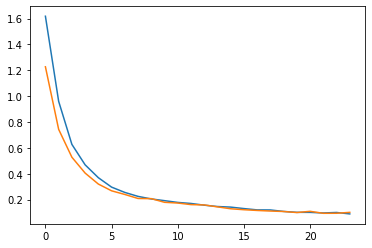

In [72]:
history = model.history.history
plt.subplot()
plt.plot(history['loss'])
plt.plot(history['val_loss'])

In [73]:
y_pred = model.predict_classes(X_test)

In [74]:
y_pred

array([6, 4, 1, ..., 2, 4, 1], dtype=int64)

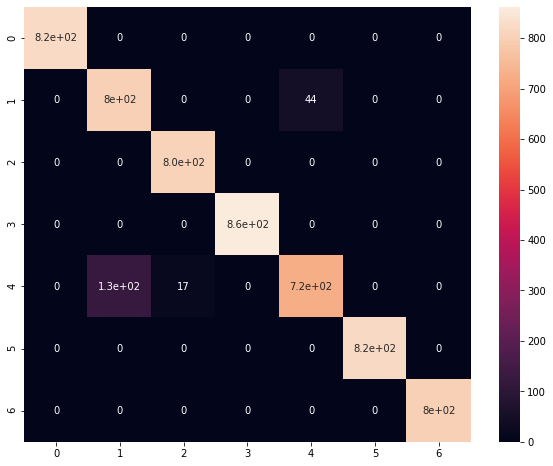

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [78]:
confusion_matrix(y_test,y_pred)

array([[823,   0,   0,   0,   0,   0,   0],
       [  0, 799,   0,   0,  44,   0,   0],
       [  0,   0, 805,   0,   0,   0,   0],
       [  0,   0,   0, 862,   0,   0,   0],
       [  0, 126,  17,   0, 725,   0,   0],
       [  0,   0,   0,   0,   0, 819,   0],
       [  0,   0,   0,   0,   0,   0, 800]], dtype=int64)

In [77]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       823\n           1       0.86      0.95      0.90       843\n           2       0.98      1.00      0.99       805\n           3       1.00      1.00      1.00       862\n           4       0.94      0.84      0.89       868\n           5       1.00      1.00      1.00       819\n           6       1.00      1.00      1.00       800\n\n    accuracy                           0.97      5820\n   macro avg       0.97      0.97      0.97      5820\nweighted avg       0.97      0.97      0.97      5820\n'

In [82]:
suma = 0
suma2 = 0
for i in range(7):
    for j in range(7):
        if i==j:
            suma = suma+confusion_matrix(y_test,y_pred)[i,j]
        else:
            suma2 = suma2+confusion_matrix(y_test,y_pred)[i,j]
print(suma/(suma+suma2))
        
    

0.9678694158075601


In [ ]:
#I could do this as webpage, where you just put some info and pipeline do the rest. For fish I didn't do it.. 
#but check my webpage monsydatascience.herokuapp.com